In [1]:
# Import our libraries 
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, classification_report

In [76]:
df = pd.read_csv('./us_crimes.csv')
df = df[df['State'] != 'United States']
df.head()

,State,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,...,Data.Rates.Violent.Robbery,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery
0,Alabama,1960,3266740,1035.4,355.9,592.1,87.3,186.6,138.1,12.4,...,27.5,33823,11626,19344,2853,6097,4512,406,281,898
1,Alabama,1961,3302000,985.5,339.3,569.4,76.8,168.5,128.9,12.9,...,19.1,32541,11205,18801,2535,5564,4255,427,252,630
2,Alabama,1962,3358000,1067.0,349.1,634.5,83.4,157.3,119.0,9.4,...,22.5,35829,11722,21306,2801,5283,3995,316,218,754
3,Alabama,1963,3347000,1150.9,376.9,683.4,90.6,182.7,142.1,10.2,...,24.7,38521,12614,22874,3033,6115,4755,340,192,828
4,Alabama,1964,3407000,1358.7,466.6,784.1,108.0,213.1,163.0,9.3,...,29.1,46290,15898,26713,3679,7260,5555,316,397,992


In [71]:
states = df['State'].unique()
print(states)
print("Number of states: %i" %len(states))

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']
Number of states: 51


In [79]:
state='New York'
df2 = df[df['State'] == state]
df2 = df2.drop(columns=['State'])
df2.head()

,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,Data.Rates.Violent.Rape,Data.Rates.Violent.Robbery,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery
1920,1965,18073000,2740.3,1015.0,1401.8,323.4,325.4,152.0,4.6,12.8,155.9,495248,183443,253353,58452,58802,27464,836,2320,28182
1921,1966,18258000,2995.4,1074.2,1568.7,352.5,342.6,159.6,4.8,13.4,164.8,546904,196127,286409,64368,62561,29142,882,2439,30098
1922,1967,18336000,3367.2,1195.2,1715.1,456.9,409.7,170.5,5.4,14.5,219.3,617404,219157,314472,83775,75124,31261,996,2665,40202
1923,1968,18113000,4035.4,1385.3,2071.1,579.0,543.9,192.9,6.5,14.0,330.5,730938,250918,375143,104877,98515,34946,1185,2527,59857
1924,1969,18321000,3991.8,1356.2,2005.7,629.9,577.9,201.4,7.2,15.8,353.4,731340,248477,367463,115400,105870,36890,1324,2902,64754


In [80]:
df.isnull().sum()

State                            0
Year                             0
Data.Population                  0
Data.Rates.Property.All          0
Data.Rates.Property.Burglary     0
Data.Rates.Property.Larceny      0
Data.Rates.Property.Motor        0
Data.Rates.Violent.All           0
Data.Rates.Violent.Assault       0
Data.Rates.Violent.Murder        0
Data.Rates.Violent.Rape          0
Data.Rates.Violent.Robbery       0
Data.Totals.Property.All         0
Data.Totals.Property.Burglary    0
Data.Totals.Property.Larceny     0
Data.Totals.Property.Motor       0
Data.Totals.Violent.All          0
Data.Totals.Violent.Assault      0
Data.Totals.Violent.Murder       0
Data.Totals.Violent.Rape         0
Data.Totals.Violent.Robbery      0
dtype: int64

In [81]:
print(df.shape)

(3055, 21)


In [82]:
n_dupes = df.duplicated().sum()
print("Number of duplicate rows are %i." %n_dupes)

Number of duplicate rows are 0.


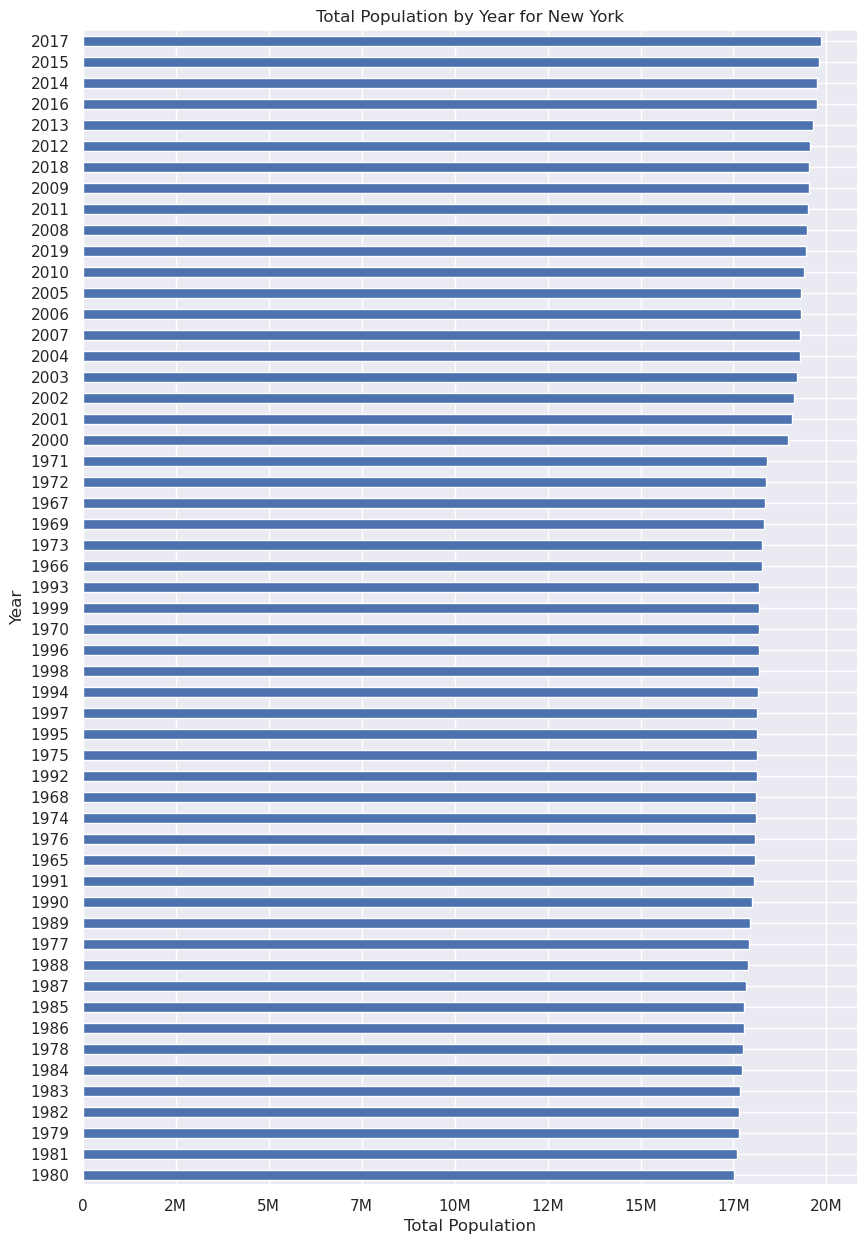

In [83]:
gb = df2.groupby('Year')['Data.Population'].sum()
plt.figure(figsize=(10,15))
gb = gb.sort_values(ascending=True)
gb.plot(kind='barh')
plt.xlabel('Total Population')
plt.ylabel('Year')
plt.title('Total Population by Year for %s' %state)

def custom_formatter(x, pos):
    if x == 0:
        return '0'
    else:
        return f'{int(x/1e6)}M'

plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(custom_formatter))
plt.show()


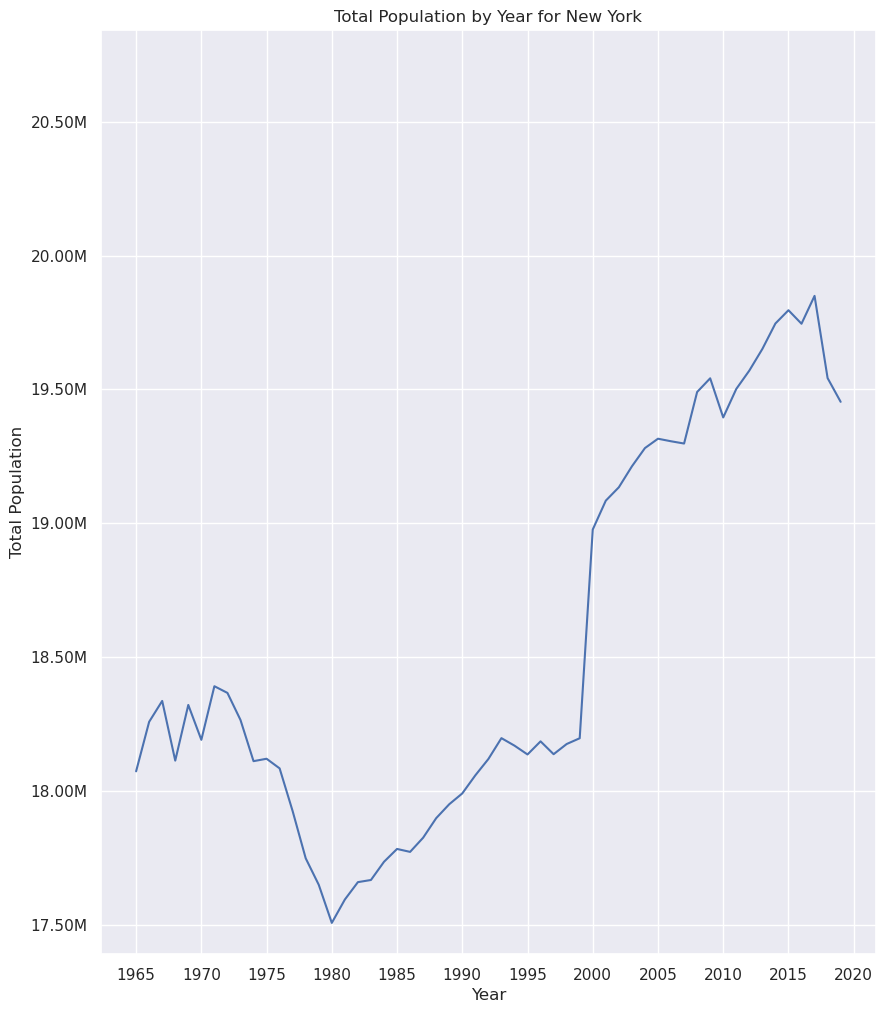

In [84]:
gb = df2.groupby('Year')['Data.Population'].sum()
plt.figure(figsize=(10, 12))
gb.plot()
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.title('Total Population by Year for %s' %state)
plt.gca().set_ylim([(gb.min() - (gb.max() - gb.min()) * 0.05), gb.max() * 1.05])

years_to_show = range(gb.index.min(), gb.index.max() + 5, 5)
plt.xticks(years_to_show)

def custom_formatter(x, pos):
    if x == 0:
        return '0'
    else:
        return f'{x/1e6:.2f}M'

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(custom_formatter))

/usr/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


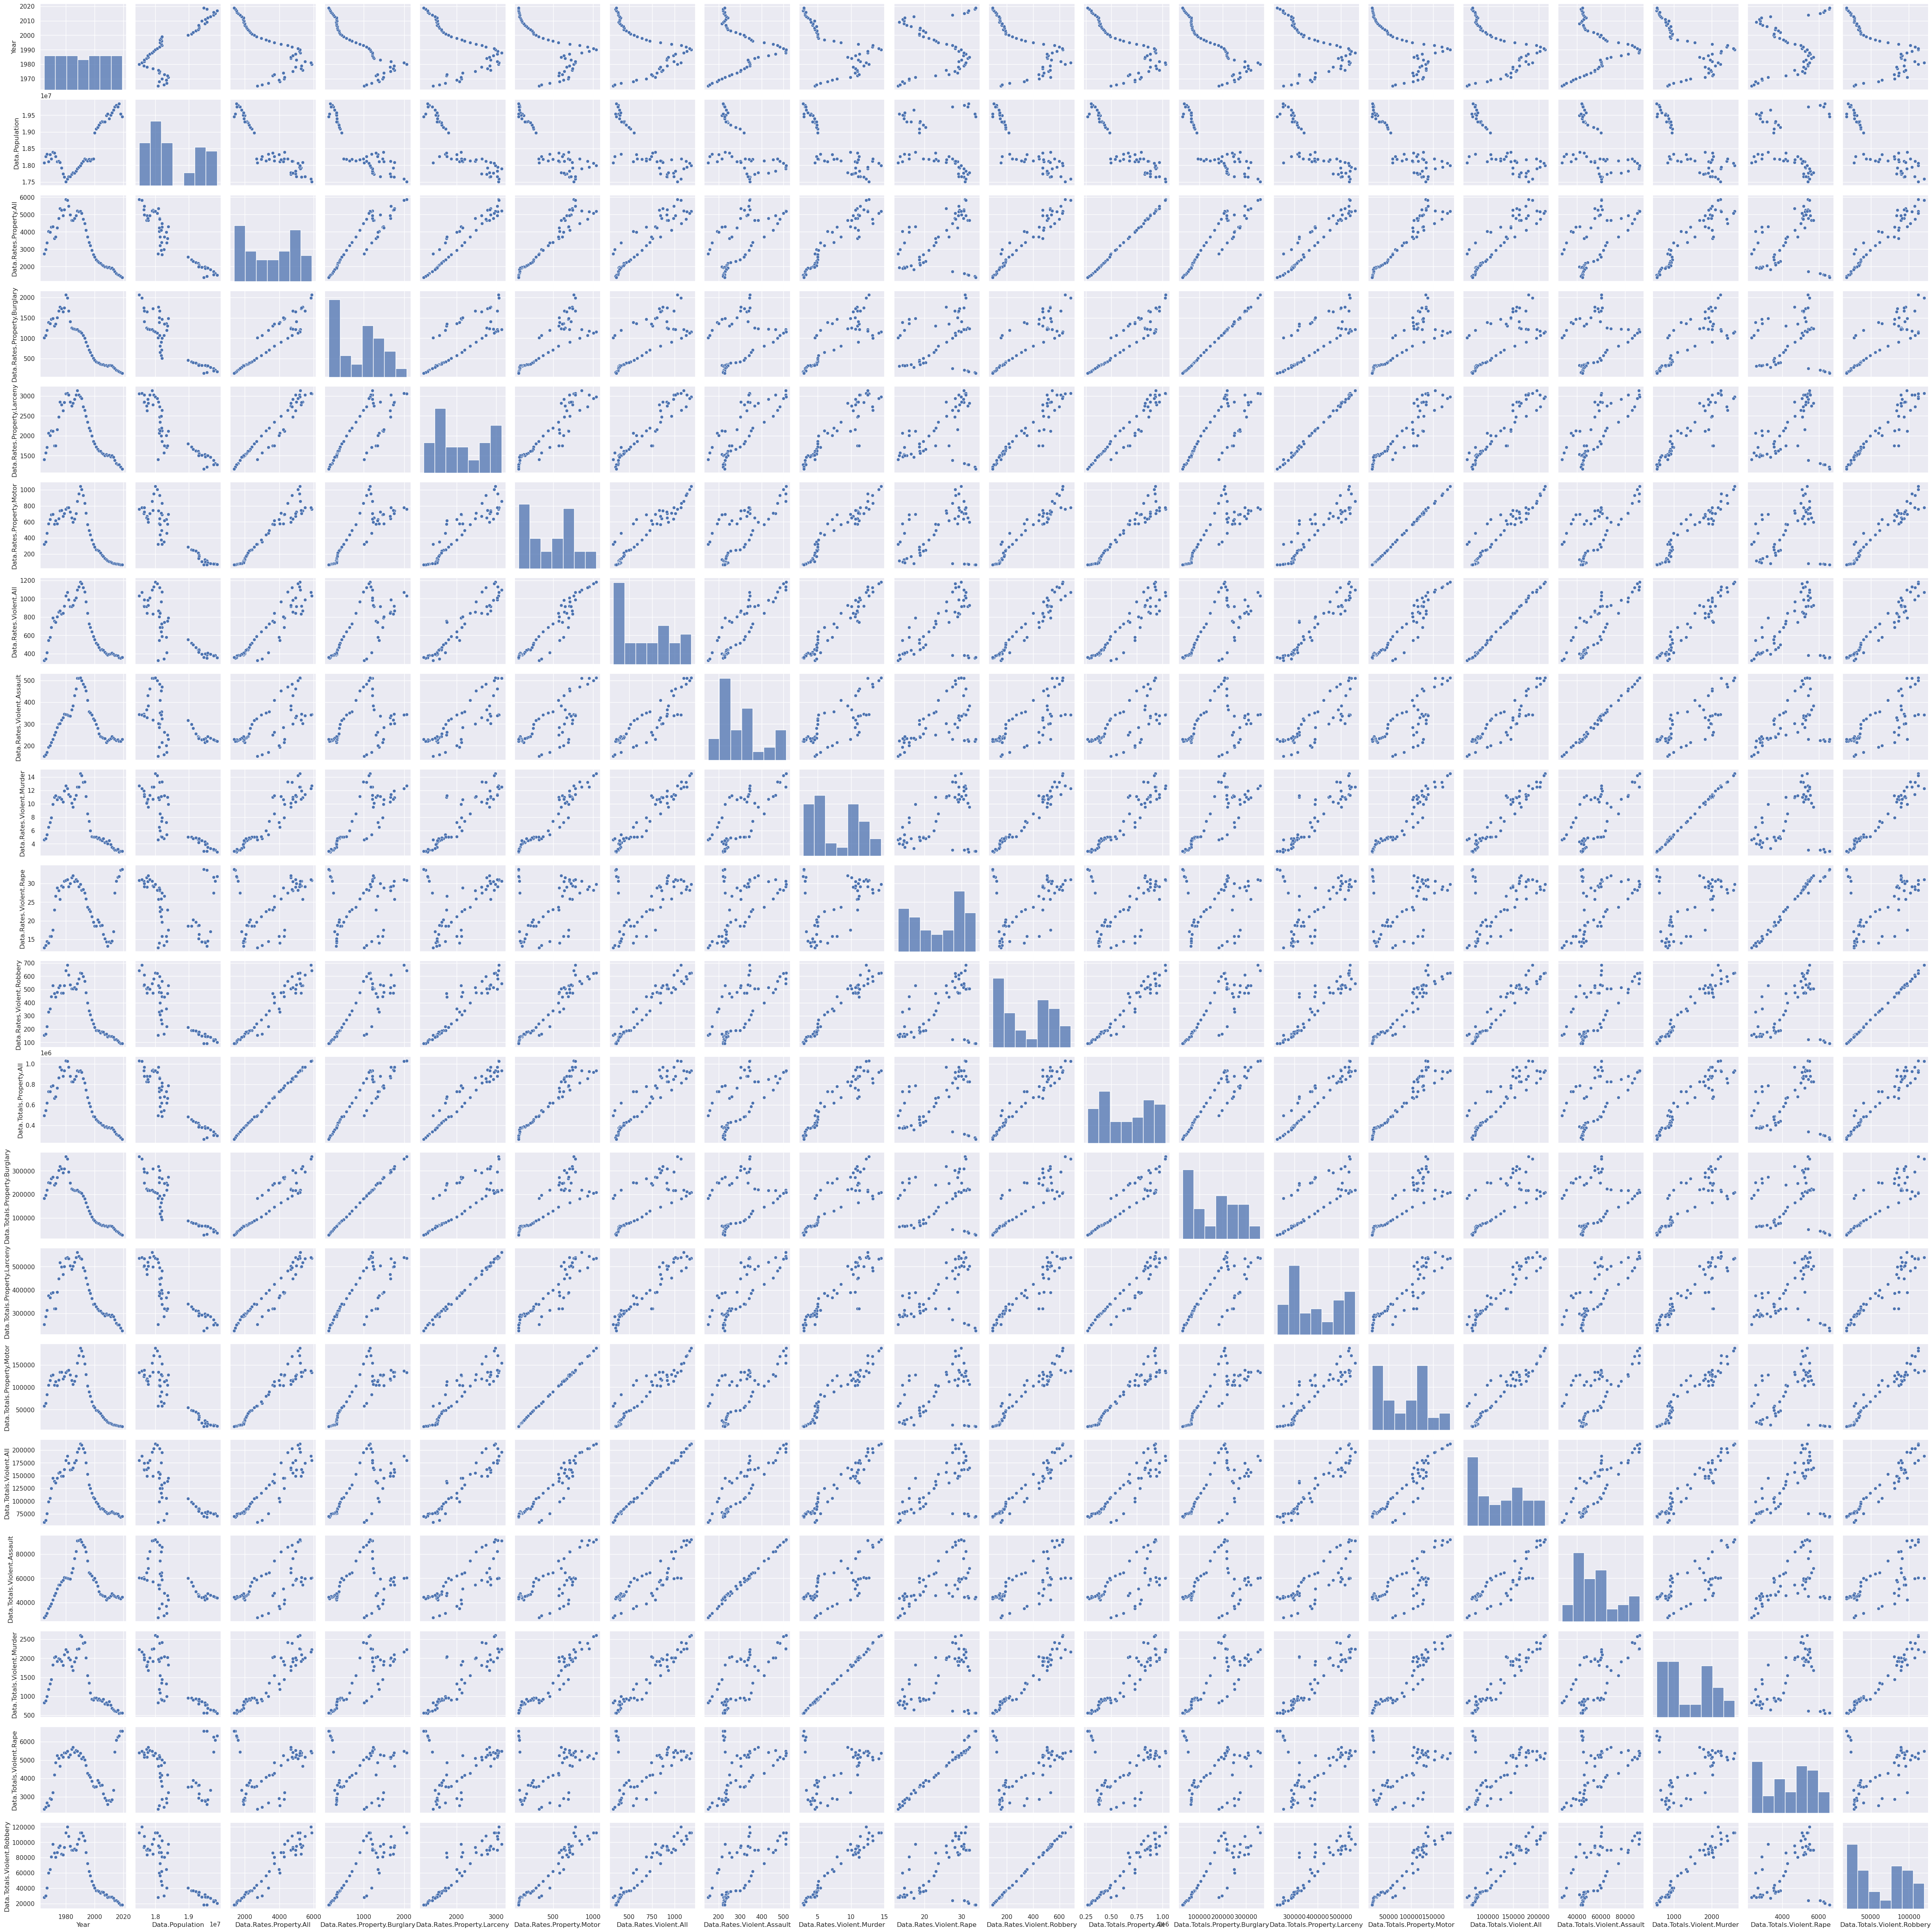

In [85]:
sns.pairplot(data=df2)